In [3]:
!pip install jupyterthemes

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

In [8]:
creditcard_df = pd.read_csv('Marketing_data.csv')

In [9]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
creditcard_df['BALANCE'].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

In [12]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [14]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [15]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# VISUALIZATION

<AxesSubplot:>

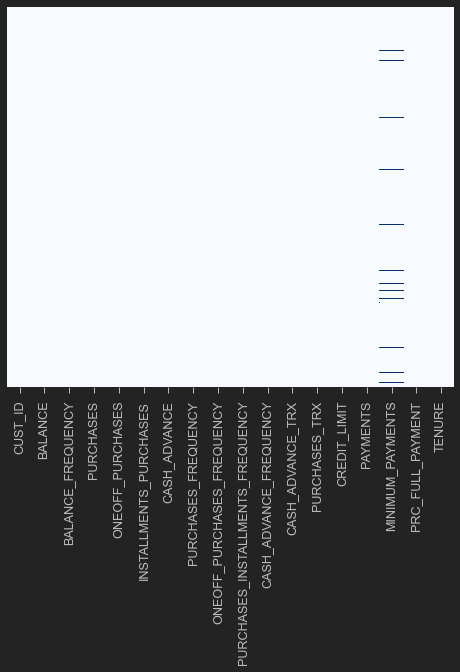

In [16]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [17]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Fill up missing elements

In [19]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=creditcard_df['MINIMUM_PAYMENTS'].mean()

In [20]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [21]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=creditcard_df['CREDIT_LIMIT'].mean()

<AxesSubplot:>

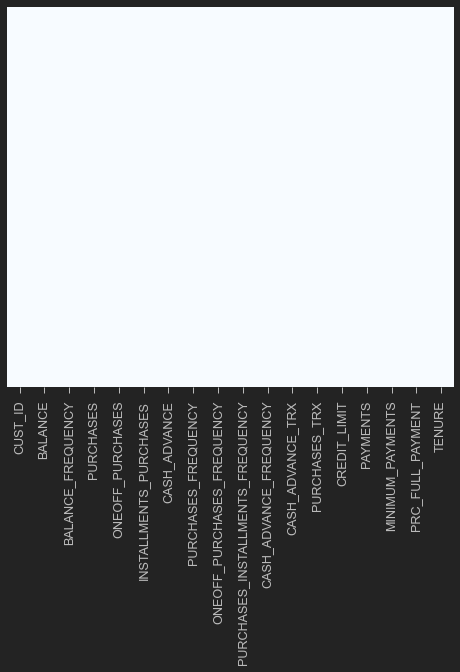

In [23]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [24]:
#Check duplicated values
creditcard_df.duplicated().sum()

0

In [28]:
#Drop customer id column
creditcard_df.drop(['CUST_ID'], axis=1 ,inplace=True)

In [29]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [33]:
n=len(creditcard_df.columns)
print (n)
creditcard_df.columns

17


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

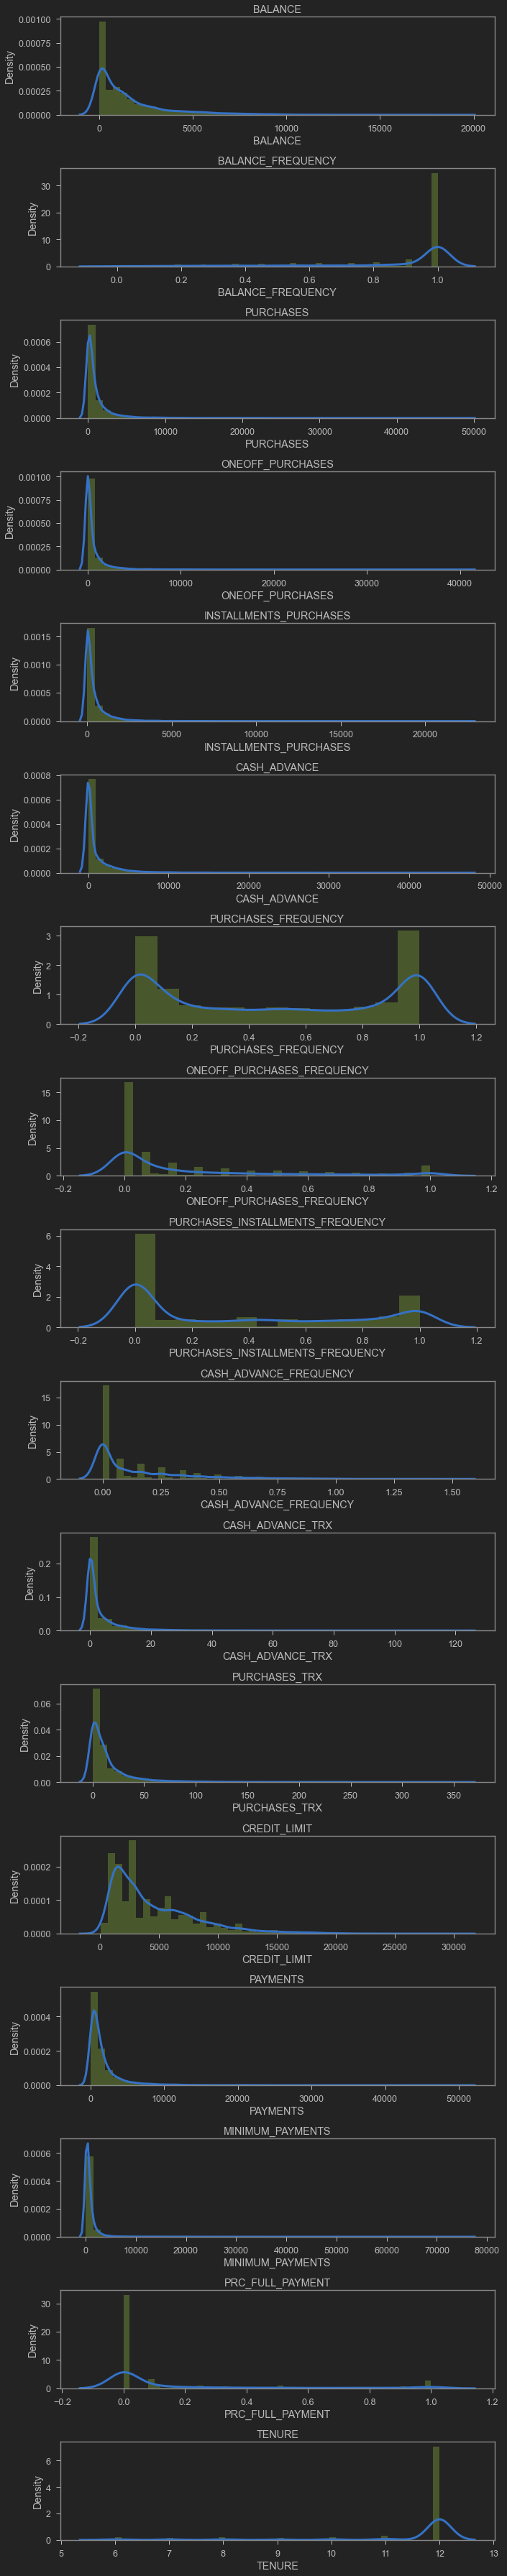

In [39]:
plt.figure(figsize = (10,50))
for i in range (len(creditcard_df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={"color":"b" ,"lw":3 ,"label":"KDE"},hist_kws={'color':'g'})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

<AxesSubplot:>

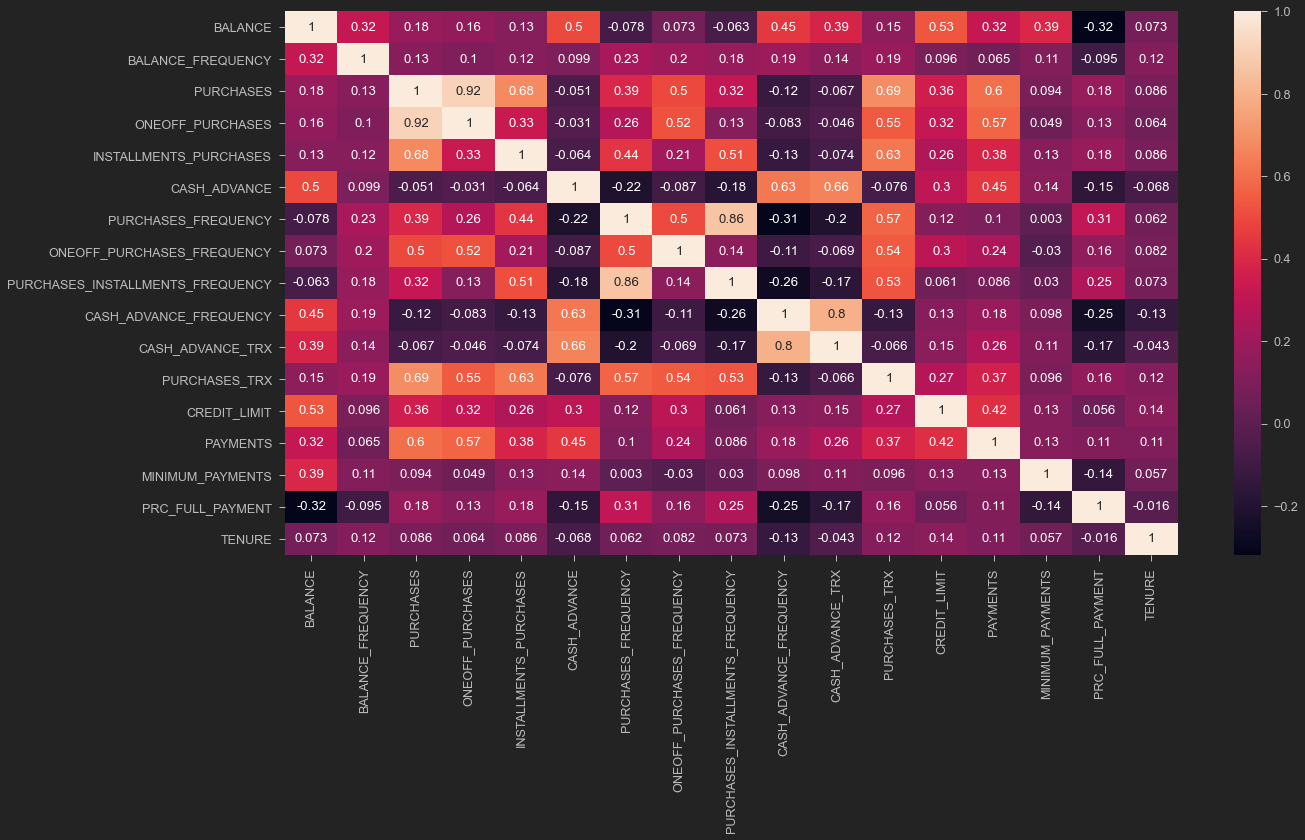

In [44]:
#correlation matrix
correlation =creditcard_df.corr()
#for size
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(correlation , annot=True)

# Find optimal no. of clusters using Elbow method

In [45]:
scaler = StandardScaler()
creditcard_df_scaled =scaler.fit_transform(creditcard_df)

In [47]:
creditcard_df_scaled.shape

(8950, 17)

In [48]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## WCSS(Within Cluster Sum of squares)

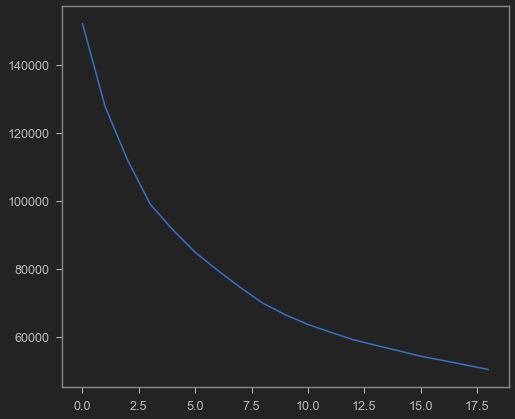

In [57]:
#For all columns
scores_1=[]
range_values= range(1,20)

for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
#WCSS VS NO. OF CLUSTERS
plt.plot(scores_1,'bx-')
#Optimal clusters= 7 or 8

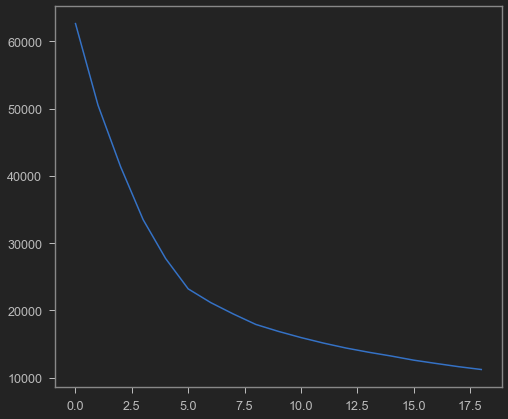

In [58]:
#For first seven columns
scores_2=[]
range_values= range(1,20)

for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled[:,:7]) #All rows but 7 columns
    scores_2.append(kmeans.inertia_)
#WCSS VS NO. OF CLUSTERS
plt.plot(scores_2,'bx-')

# APPLY K-MEANS

In [59]:
kmeans=KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels =kmeans.labels_

In [61]:
kmeans.cluster_centers_.shape #Centroid of different clusters

(7, 17)

In [66]:
# Centroid for all columns
cluster_centers= pd.DataFrame(data=kmeans.cluster_centers_ , columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701543,-2.133587,-0.305982,-0.230503,-0.299905,-0.324030,-0.537637,-0.436587,-0.427520,-0.523134,-0.377605,-0.414550,-0.175050,-0.200441,-0.257489,0.288170,0.200378
1,0.524277,0.454804,1.798438,1.545694,1.412602,-0.240267,1.153143,1.794249,0.966087,-0.353333,-0.263881,2.104041,1.113781,0.971636,0.197651,0.472558,0.310304
2,1.671486,0.394844,-0.211058,-0.150129,-0.223304,1.991806,-0.451085,-0.175268,-0.409414,1.905279,1.915647,-0.253699,1.013354,0.813947,0.566762,-0.392488,0.073214
3,-0.341141,-0.333100,-0.280989,-0.207459,-0.282905,0.060232,-0.171997,-0.271368,-0.207953,0.291927,-0.007982,-0.379541,-0.560480,-0.389957,-0.207857,0.021533,-3.178761
4,0.018074,0.403907,-0.348728,-0.229219,-0.403334,-0.095952,-0.838344,-0.367101,-0.763042,0.099250,-0.032095,-0.474034,-0.298306,-0.245820,-0.006715,-0.455446,0.272674
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
6,-0.336978,0.355340,0.032553,-0.088290,0.238997,-0.368884,0.977456,0.199920,0.895697,-0.470867,-0.359569,0.231858,-0.143487,-0.179705,-0.080949,0.329358,0.271775


In [68]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers= pd.DataFrame(data=cluster_centers , columns=[creditcard_df.columns])
cluster_centers
#First cluster-Transactor
#Second-Revolvers
#Third-VIP
#Fourth-Low tenure

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.272448,0.371844,349.469265,209.849357,139.867654,299.364326,0.274571,0.072215,0.194530,0.030460,0.671953,4.405676,3857.545446,1152.887104,264.138375,0.238000,11.785476
1,2655.712374,0.985010,4845.596110,3157.972963,1688.465843,475.020604,0.953163,0.737717,0.748385,0.064439,1.448034,67.008427,8546.839888,4545.936049,1324.824872,0.291930,11.932584
2,5043.530870,0.970806,552.275771,343.253161,209.136974,5155.780925,0.309308,0.150172,0.201726,0.516410,16.321710,8.403825,8181.444933,4089.440839,2185.020685,0.038918,11.615298
3,854.418008,0.798362,402.868166,248.098605,155.239781,1105.181375,0.421320,0.121503,0.281791,0.193562,3.194357,5.275862,2455.195062,604.255929,379.804248,0.160013,7.263323
4,1602.095244,0.972953,258.141752,211.981551,46.337896,777.655560,0.153883,0.092944,0.061185,0.155005,3.029803,2.927110,3409.090365,1021.519339,848.556397,0.020504,11.882226
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,863.082636,0.961447,1072.753769,445.894859,627.190000,205.304778,0.882651,0.262098,0.720410,0.040919,0.795033,20.472943,3972.386017,1212.915578,675.558052,0.250046,11.881023


In [69]:
labels.shape

(8950,)

In [72]:
labels.max()

6

In [73]:
labels.min()

0

In [78]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 5, 1, ..., 1, 2, 3])

In [80]:
#Add a new column name cluster
creditcard_df_cluster= pd.concat([creditcard_df,pd.DataFrame({'Cluster':labels})],axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


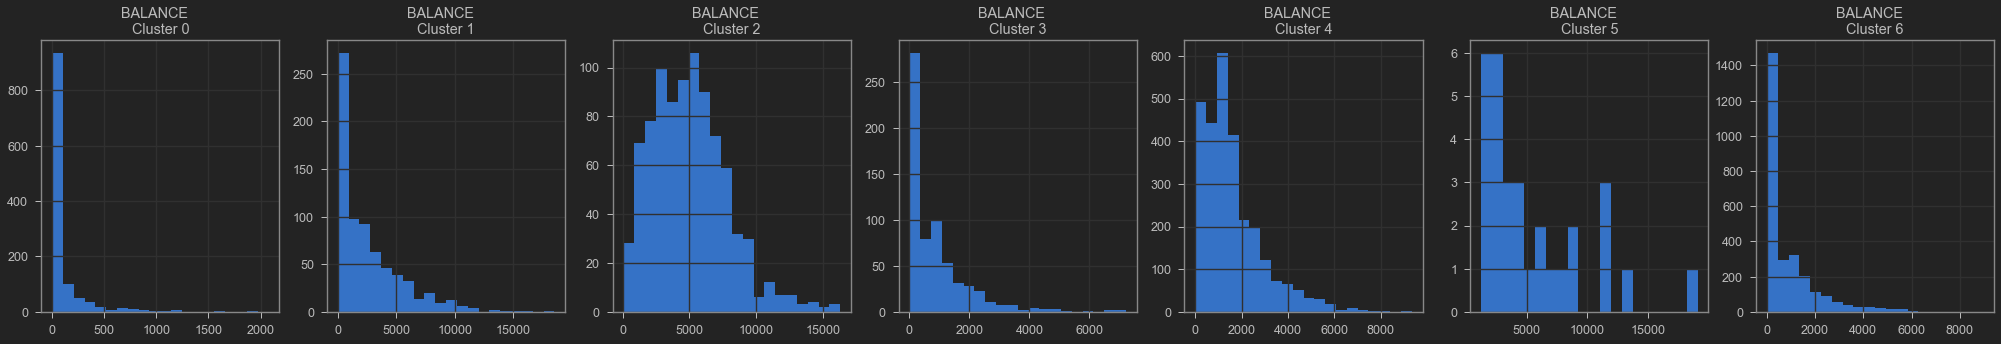

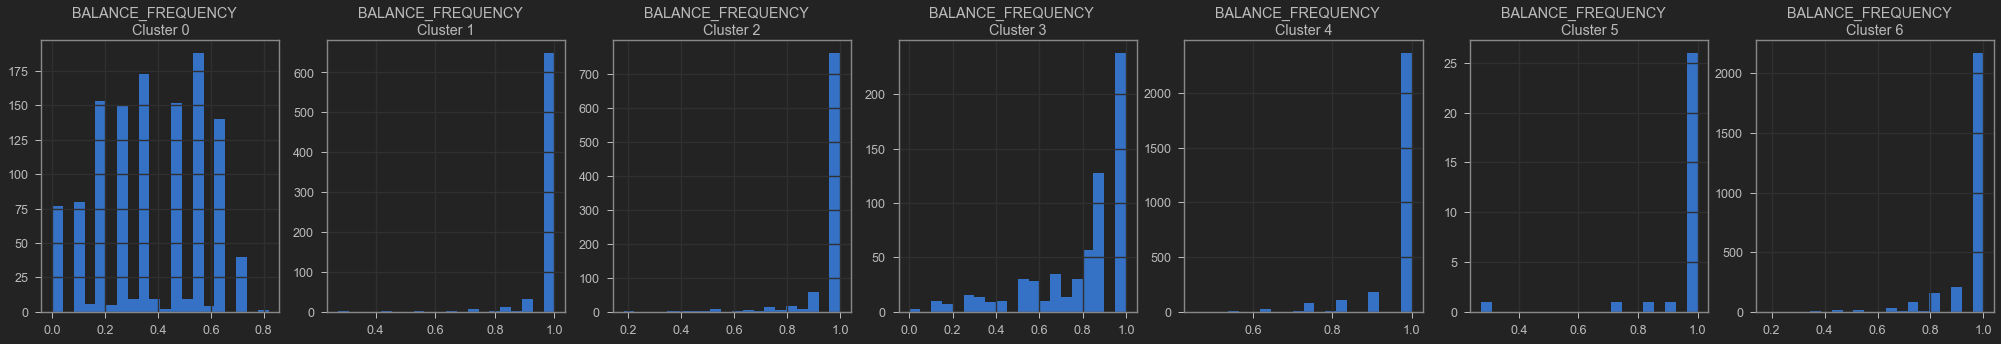

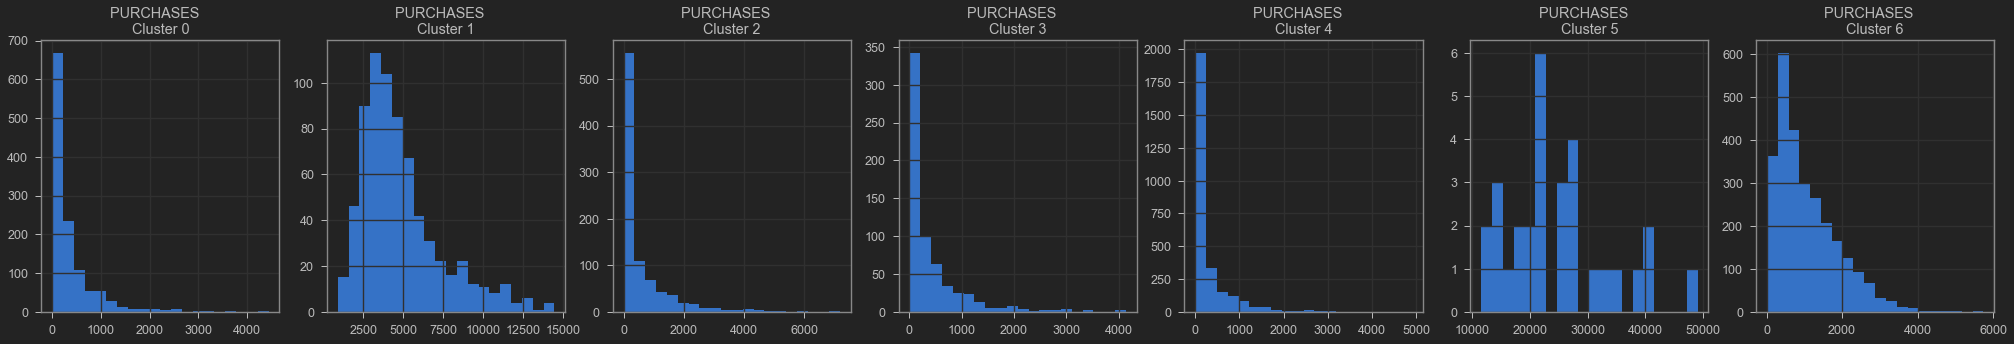

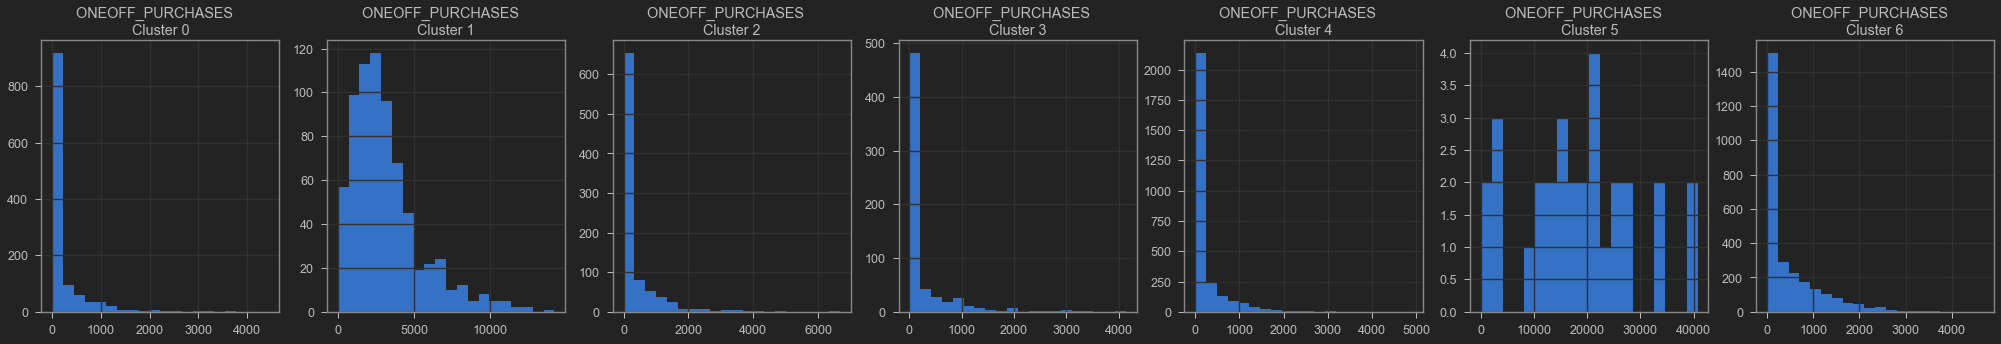

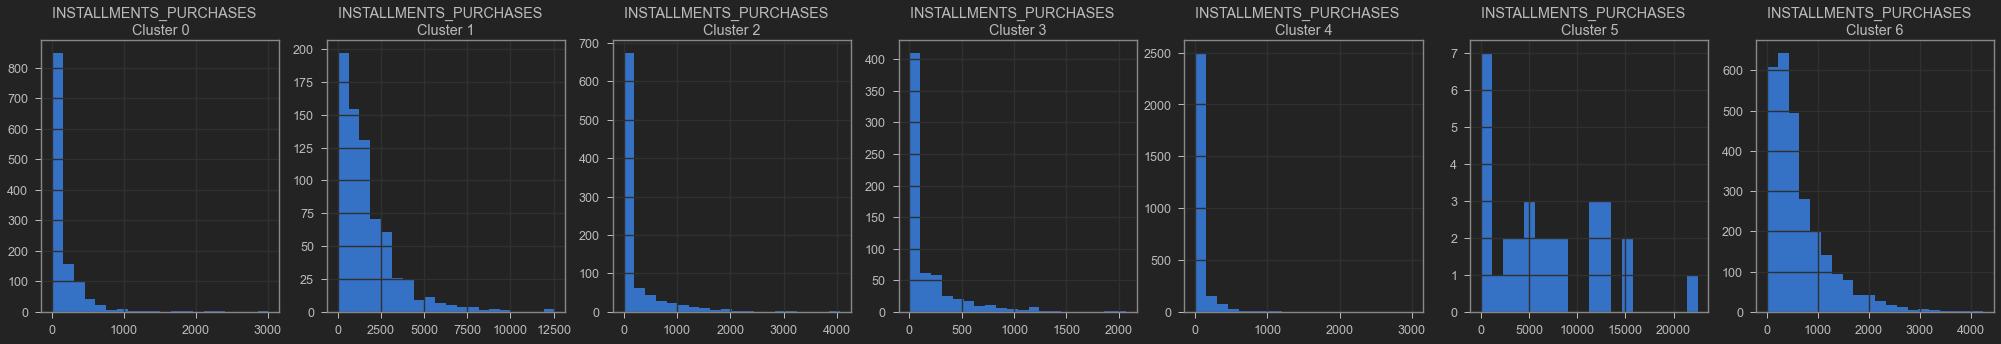

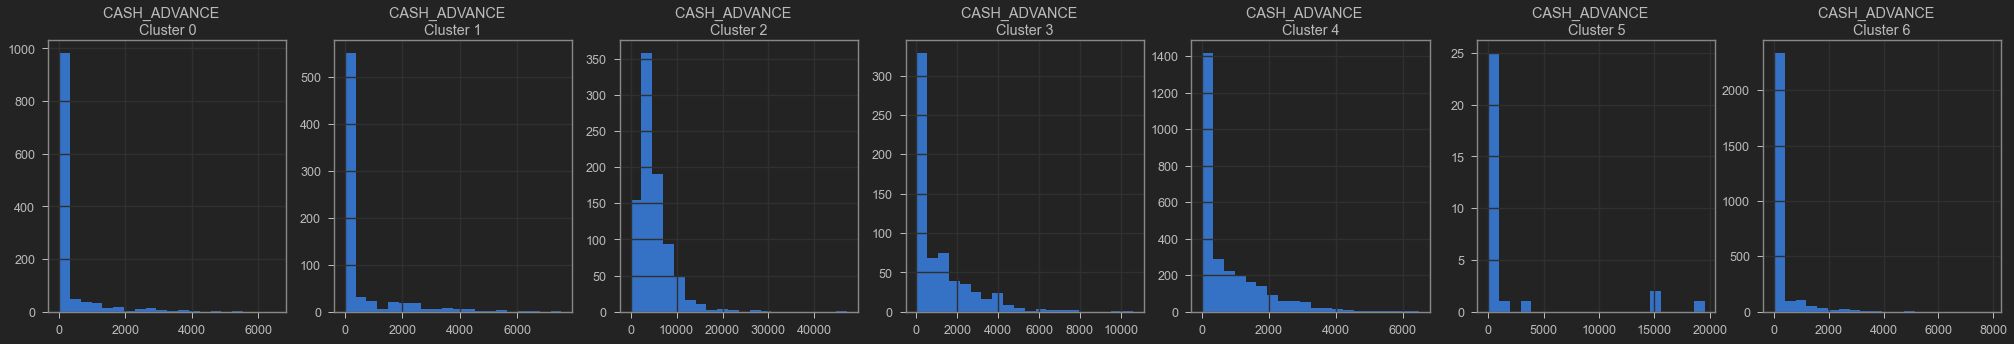

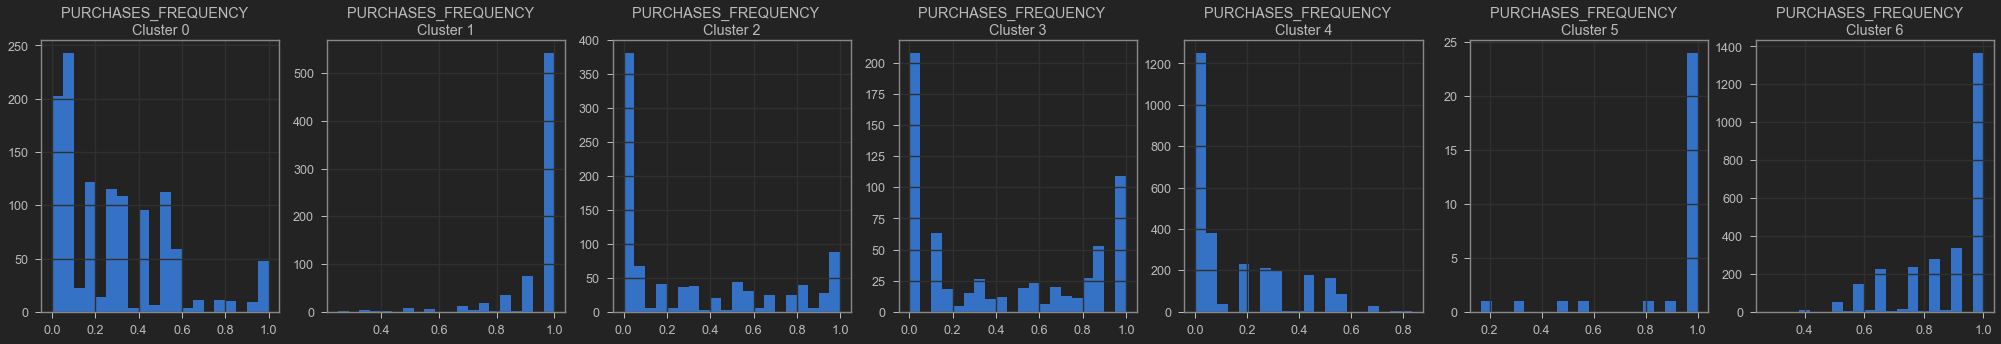

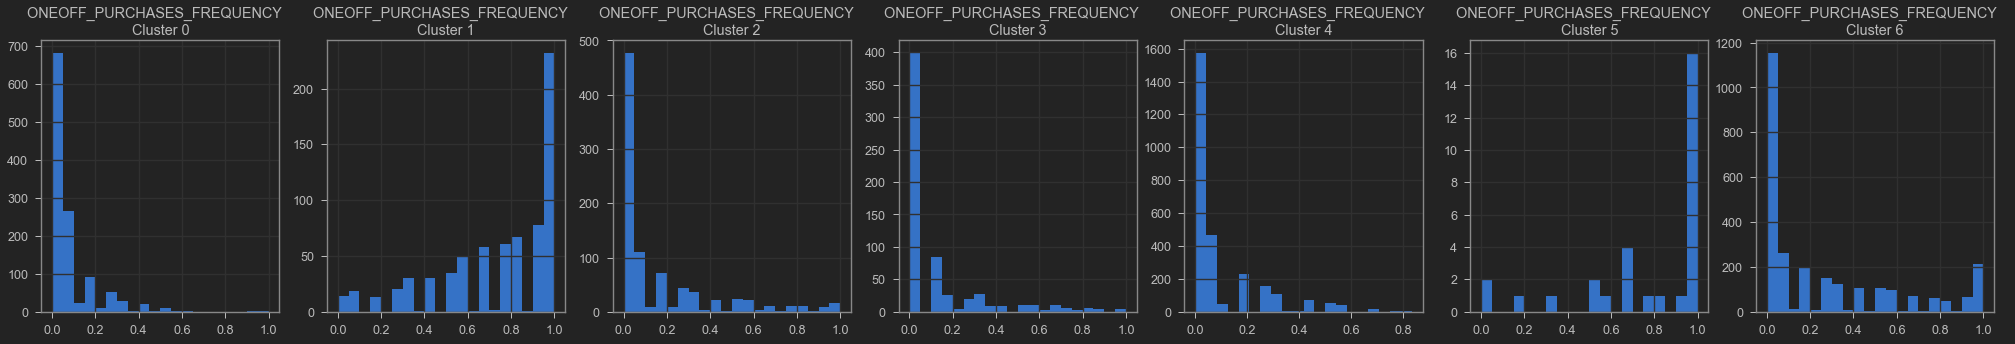

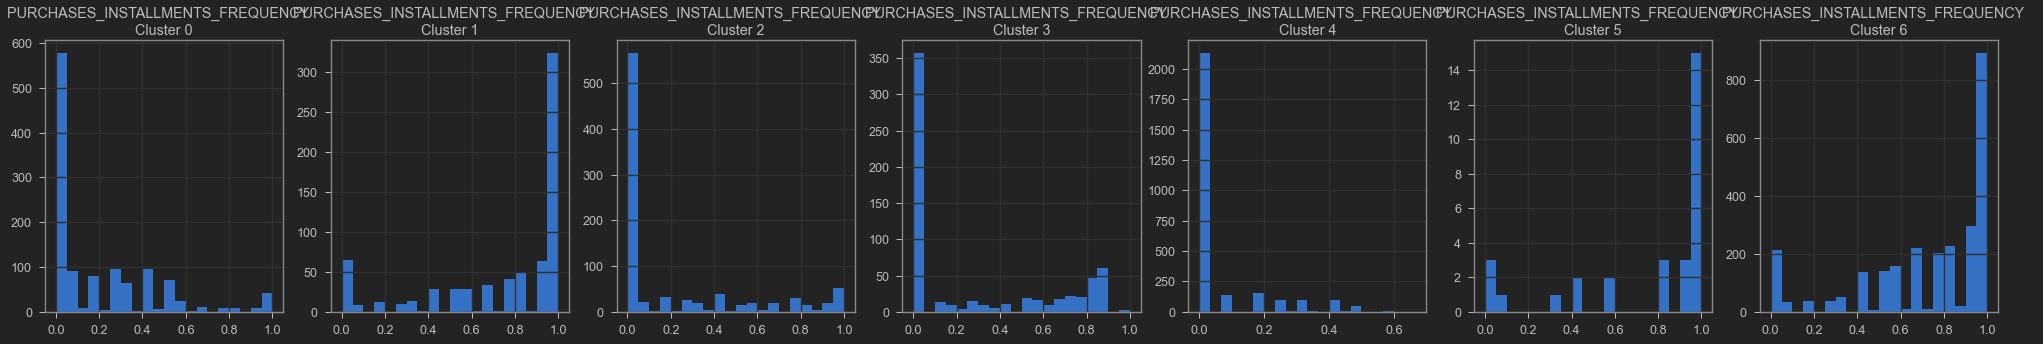

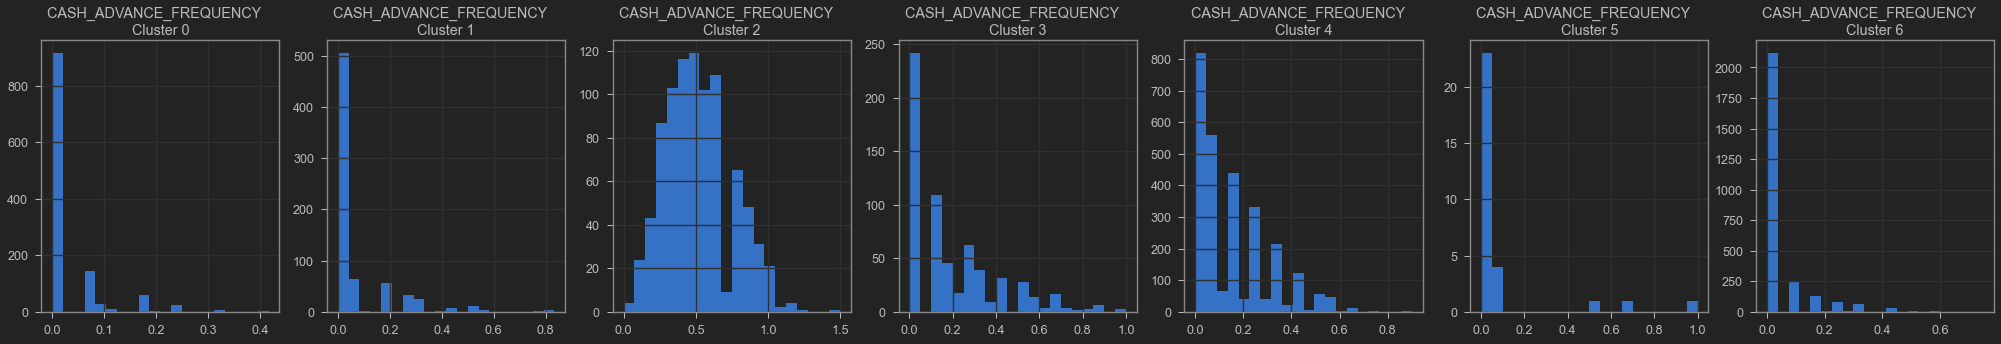

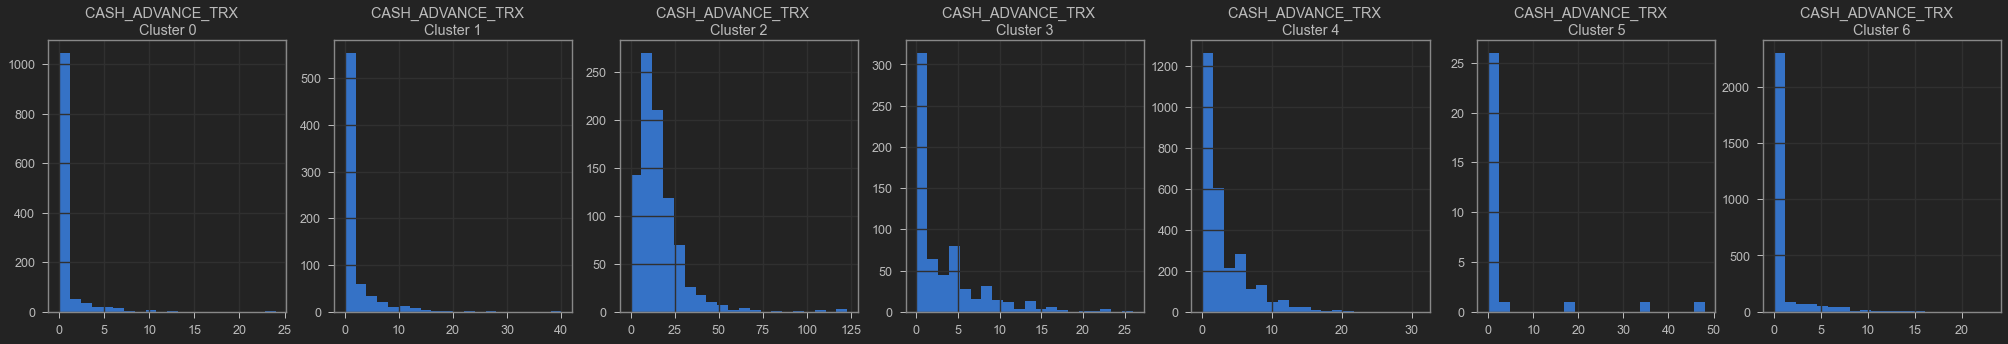

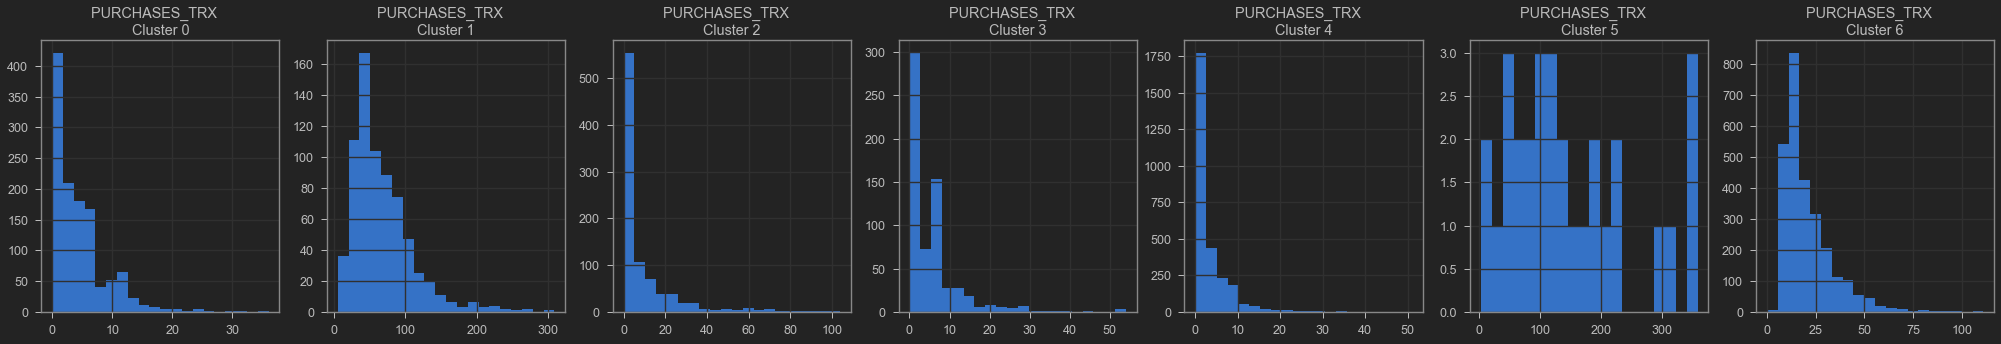

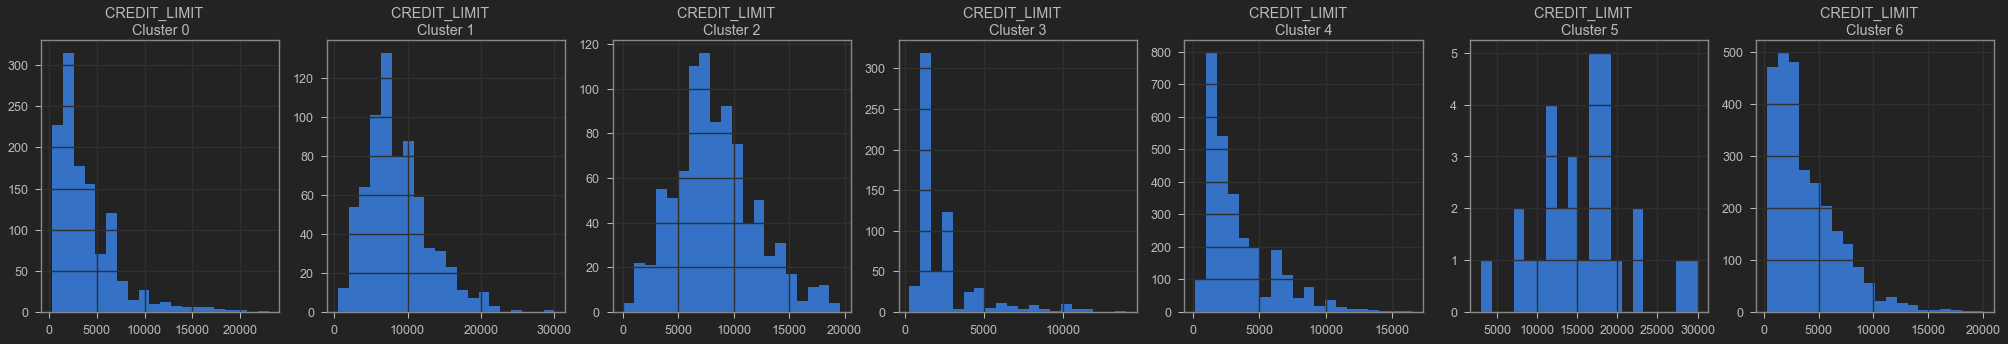

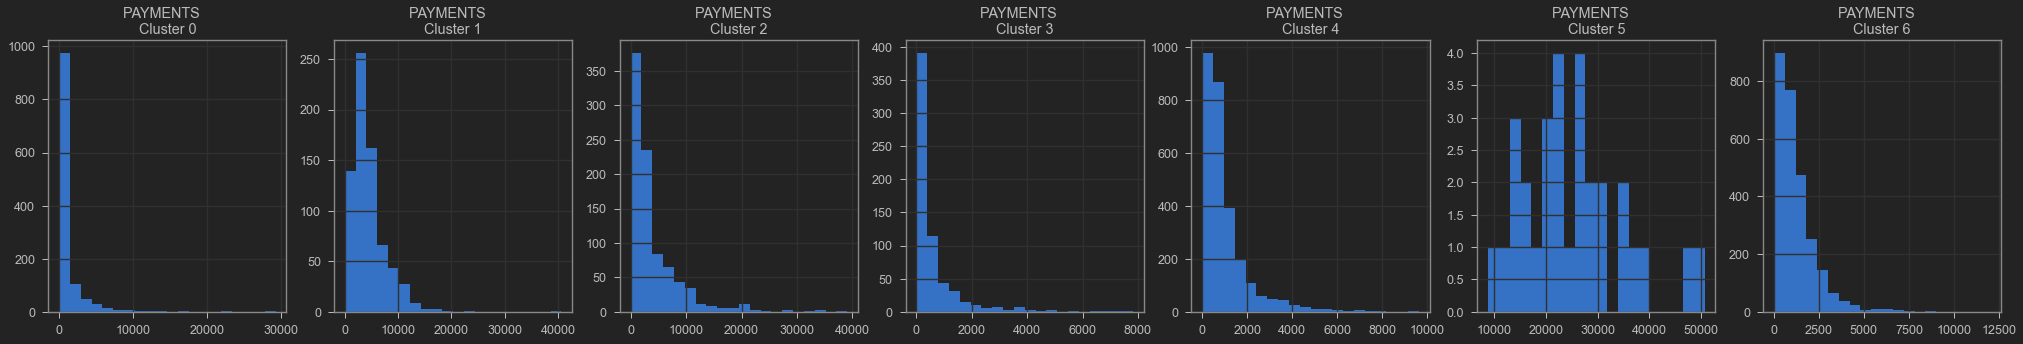

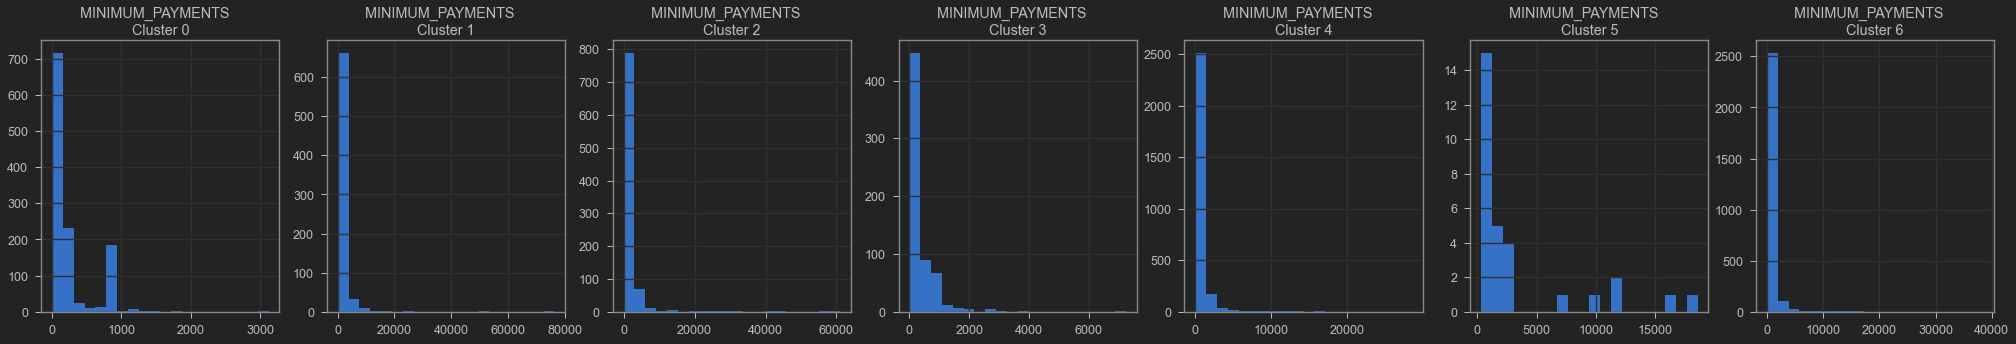

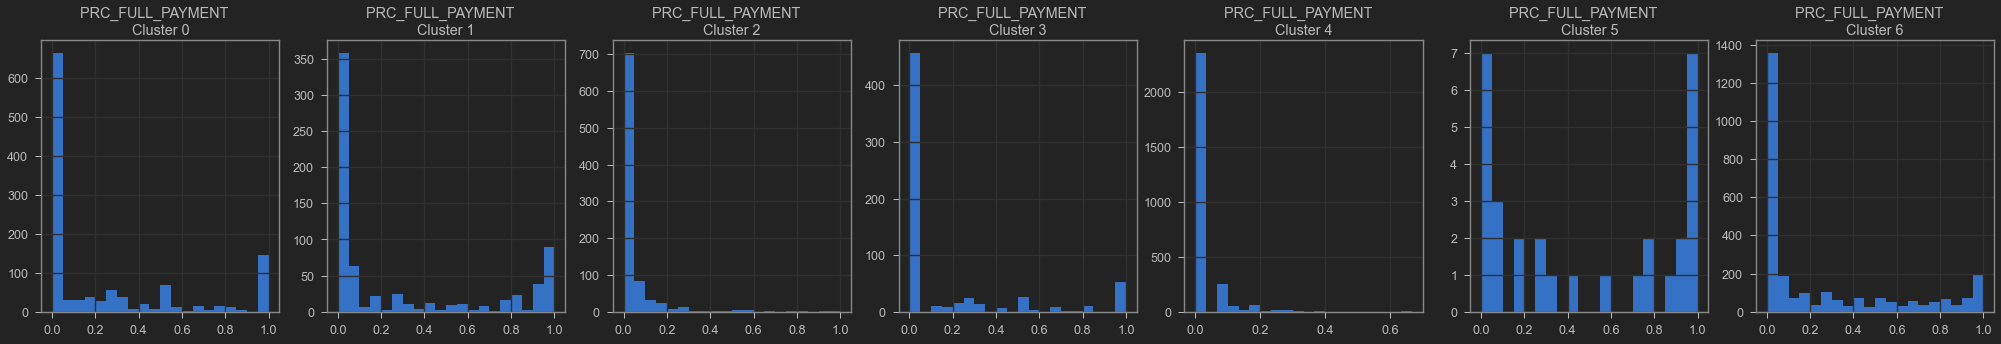

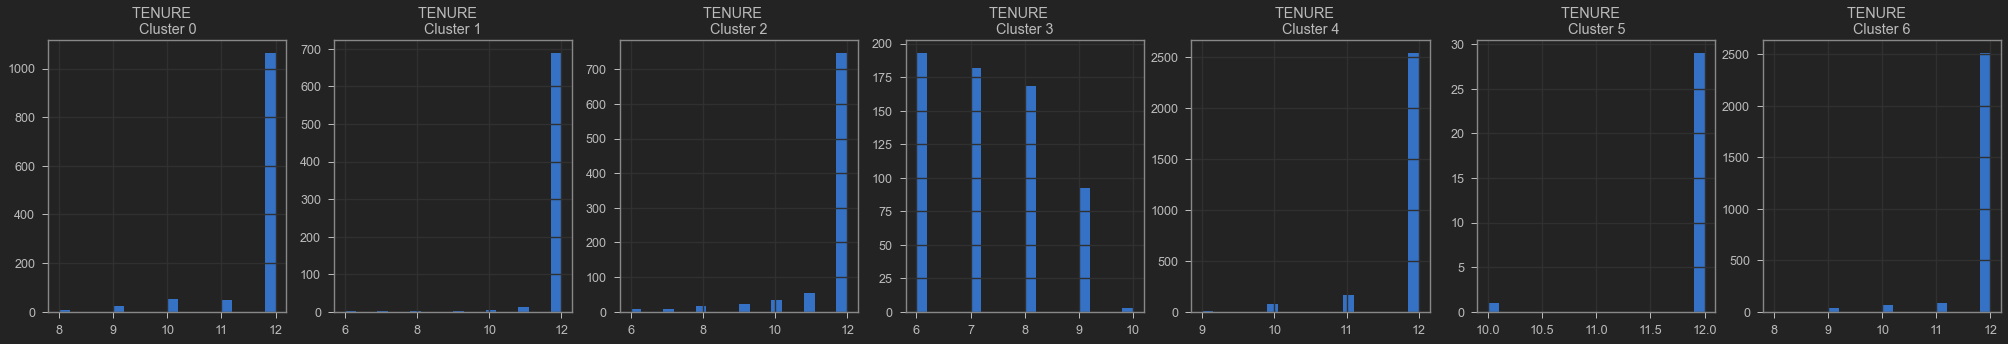

In [82]:
for i in creditcard_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster=creditcard_df_cluster[creditcard_df_cluster['Cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{}   \nCluster {}'.format(i,j))
        
plt.show()

# Apply PCA(Principal Component Analysis)

In [83]:
pca = PCA(n_components=2)
principal_comp =pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221972, -1.07645219],
       [-1.13828883,  2.50647801],
       [ 0.96968065, -0.38352858],
       ...,
       [-0.92620565, -1.81078787],
       [-2.33655278, -0.65796354],
       [-0.55642307, -0.40046237]])

In [84]:
pca_df=pd.DataFrame(data=principal_comp ,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138289,2.506478
2,0.969681,-0.383529
3,-0.873625,0.043165
4,-1.599435,-0.688583


In [85]:
pca_df=pd.concat([pca_df,pd.DataFrame({'Cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,Cluster
0,-1.682220,-1.076452,4
1,-1.138289,2.506478,2
2,0.969681,-0.383529,6
3,-0.873625,0.043165,4
4,-1.599435,-0.688583,4


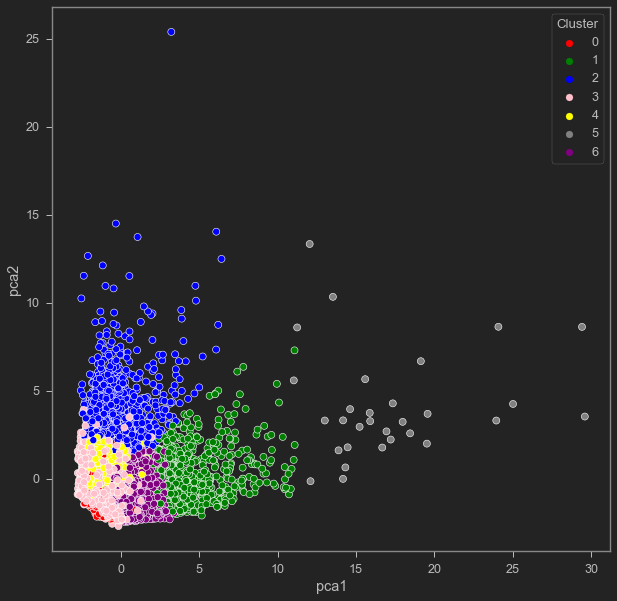

In [86]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',hue='Cluster',data=pca_df,palette=['red','green','blue','pink','yellow','gray','purple'])
plt.show()